# Obtaining the diffraction effeciency.dat

This is a jupyter notebook to see if the diffraction_eff.dat can be plotted

In [27]:
# . Honours Module Folder
# ├ FYPLibrary
# | ├ file_reading.py
# | └ IQ_demod.py
# └ Sub Project folder i.e.: os.path.abspath('')
#   ├ this notebook(.ipynb)
#   └ traces
#     └ AOM-diffraction-eff.dat

# Initialization: Directory appending for my system. Vary the directories as necessary.
import sys
import os.path
# Add the FYPLibrary folder in the same level as this folder.
parent_dir = os.path.dirname(os.path.abspath(''))
if os.path.join(parent_dir, 'FYPLibrary') not in sys.path:
    sys.path.append(os.path.join(parent_dir, 'FYPLibrary'))
del parent_dir

# from pprint import pprint
# pprint(sys.path)

# within this jupyter notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import pi
from scipy.optimize import curve_fit

# import matplotlib.dates as mdates
# import matplotlib.units as munits


In [28]:
def get_files():
    # uses tkinter to get the paths. returns all files as selected by UI
    # tkinter will not allow for extracting files from multiple folders
    import tkinter as tk
    from tkinter import filedialog

    root = tk.Tk()
    root.withdraw()
    fs = filedialog.askopenfilenames(initialdir= os.path.dirname(os.path.abspath('')), 
        title="Select files")
    return fs

def get_folder():
    # uses tkinter to get a folder
    import tkinter as tk
    from tkinter import filedialog

    root = tk.Tk()
    root.withdraw()
    my_dir = filedialog.askdirectory(initialdir= os.path.dirname(os.path.abspath('')), 
        title="Select directory")
    return my_dir

We pull put the processedLogs txt file first.

In [29]:
# Step 1: Change the name to which the folder you wish to read from
# Yield all files in batch folder
file = os.path.join(os.path.abspath(''), "traces", "AOM-diffraction-eff.dat")

In [30]:
data_table = pd.read_csv(file, sep='\s+')

In [31]:
data_table

,aom-freq,1st_order_powermeter
0,60,50.0
1,61,52.8
2,62,55.1
3,63,56.6
4,64,57.7
5,65,57.8
6,66,56.8
7,67,58.0
8,68,61.3
9,69,65.9


In [32]:
freq = data_table['aom-freq'].values
eff = data_table['1st_order_powermeter'].values

Now trying to plot std_dev against time

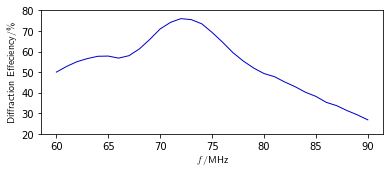

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(freq, eff, color = 'mediumblue', linewidth= 1)
ax.set_ylim(20,80)
ax.set_ylabel(r'Diffraction Effeciency/\%', usetex= True)
ax.set_xlabel(r'$f$/MHz', usetex= True)
fig.set_size_inches(0.85*(8.25-0.875*2), 2.50) 
fig.tight_layout()